# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    b = arr == 0
    return np.nanmax(np.append(arr[1:][b[:len(b)-1]], np.NaN))

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [3]:
def nearest_value(X, v): #https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array
    Vec = X.flatten()
    return Vec[(np.abs(Vec-v)).argmin()]

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [4]:
def scale(X):
    m, s = np.mean(X, axis=0), np.std(X, axis=0)
    if 0 not in s:
        return (X - m)/s
    else:
        print('Mayday, division by zero')

In [5]:
x = np.random.randint(9, size=(3, 3))
print('raw matrix: \n', x)
print('scaled matrix: \n', scale(x))

raw matrix: 
 [[6 8 6]
 [2 5 6]
 [5 5 3]]
scaled matrix: 
 [[ 0.98058068  1.41421356  0.70710678]
 [-1.37281295 -0.70710678  0.70710678]
 [ 0.39223227 -0.70710678 -1.41421356]]


**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [6]:
def get_stats(X):
    det = np.linalg.det(X)
    tr = np.trace(X)
    mamin = X.min()
    mamax = X.max()
    fro = np.linalg.norm(X, ord = 'fro')
    eig = np.linalg.eig(X)[0]
    inv = np.linalg.inv(X)
    return 'determinant:', det, 'trace:', tr, 'min value', mamin, 'max value', mamax, 'norm', fro,'eigenvector:', eig,'inverse:', inv

In [7]:
x = np.random.normal(loc=10.0, scale=1.0, size=(3,3))
get_stats(x)

('determinant:',
 25.860957523505153,
 'trace:',
 33.154719547168526,
 'min value',
 8.5489278105463207,
 'max value',
 11.863113728828903,
 'norm',
 30.963295535154135,
 'eigenvector:',
 array([ 30.90267753,   0.46946055,   1.78258147]),
 'inverse:',
 array([[ 1.37084298, -0.48277133, -0.96902576],
        [-0.81425098,  0.5923972 ,  0.33443467],
        [-0.65818852, -0.0250621 ,  0.76020809]]))

**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [8]:
ma = np.zeros(100)
for exp_num in range(100):
    X1, X2 = np.random.normal(size=(10,10)), np.random.normal(size=(10,10))
    m = np.dot(X1, X2).max()
    ma[exp_num] = m

In [9]:
print('mean:\n', np.mean(ma),'\n95 percentile: \n', np.percentile(ma, 95))

mean:
 8.48005209269 
95 percentile: 
 12.4043985521


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [10]:
import pandas as pd
df = pd.read_csv('2008.csv')

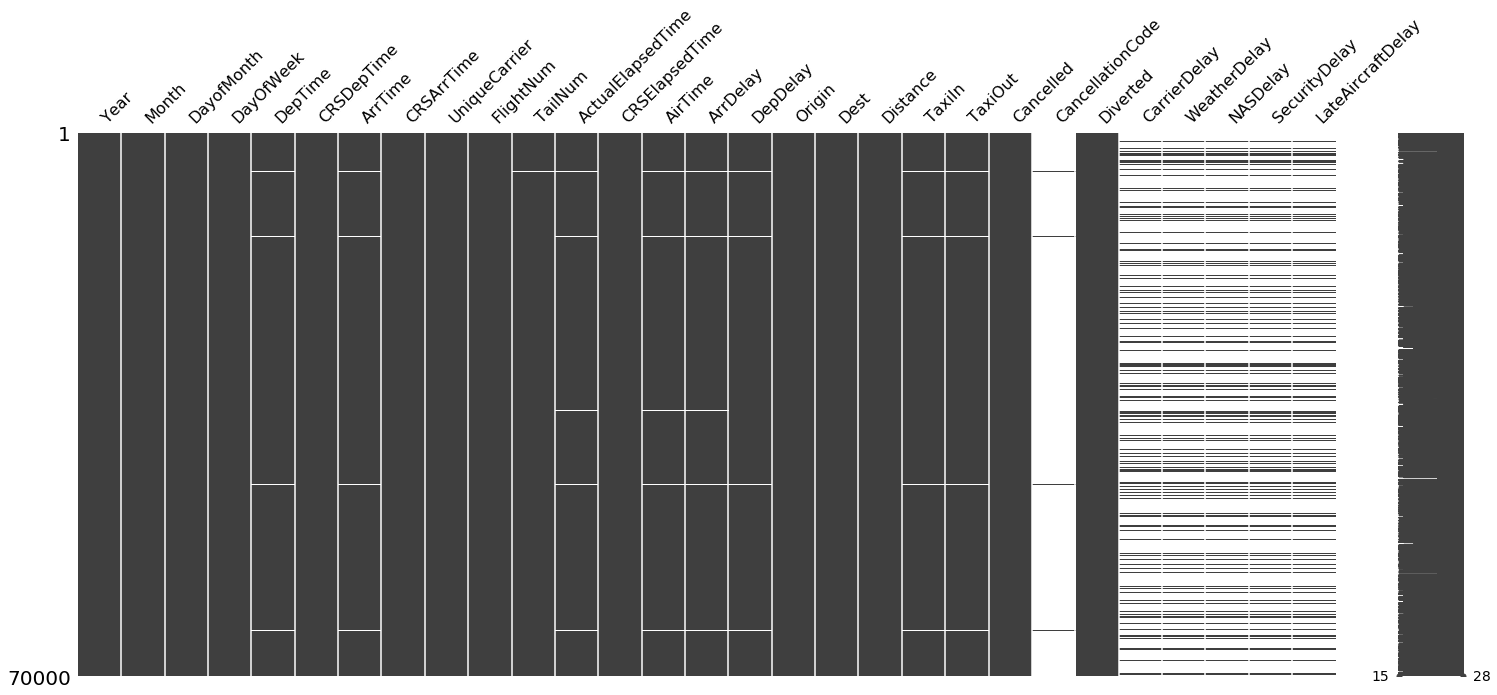

In [11]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [12]:
print('Имеются пропущенные значения: ',df.isnull().values.any())

Имеются пропущенные значения:  True


In [13]:
print('Количество пропущенных элементов: ', df.isnull().sum().sum())

Количество пропущенных элементов:  355215


In [14]:
print('Количество объектов с хотя бы одним пропуском: ',df.isnull().any(axis=1).value_counts()[1])

Количество объектов с хотя бы одним пропуском:  70000


In [15]:
print('Количество признаков с хотя бы одним пропущенным значением:\n',df.isnull().any().value_counts()[1])

Количество признаков с хотя бы одним пропущенным значением:
 16


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

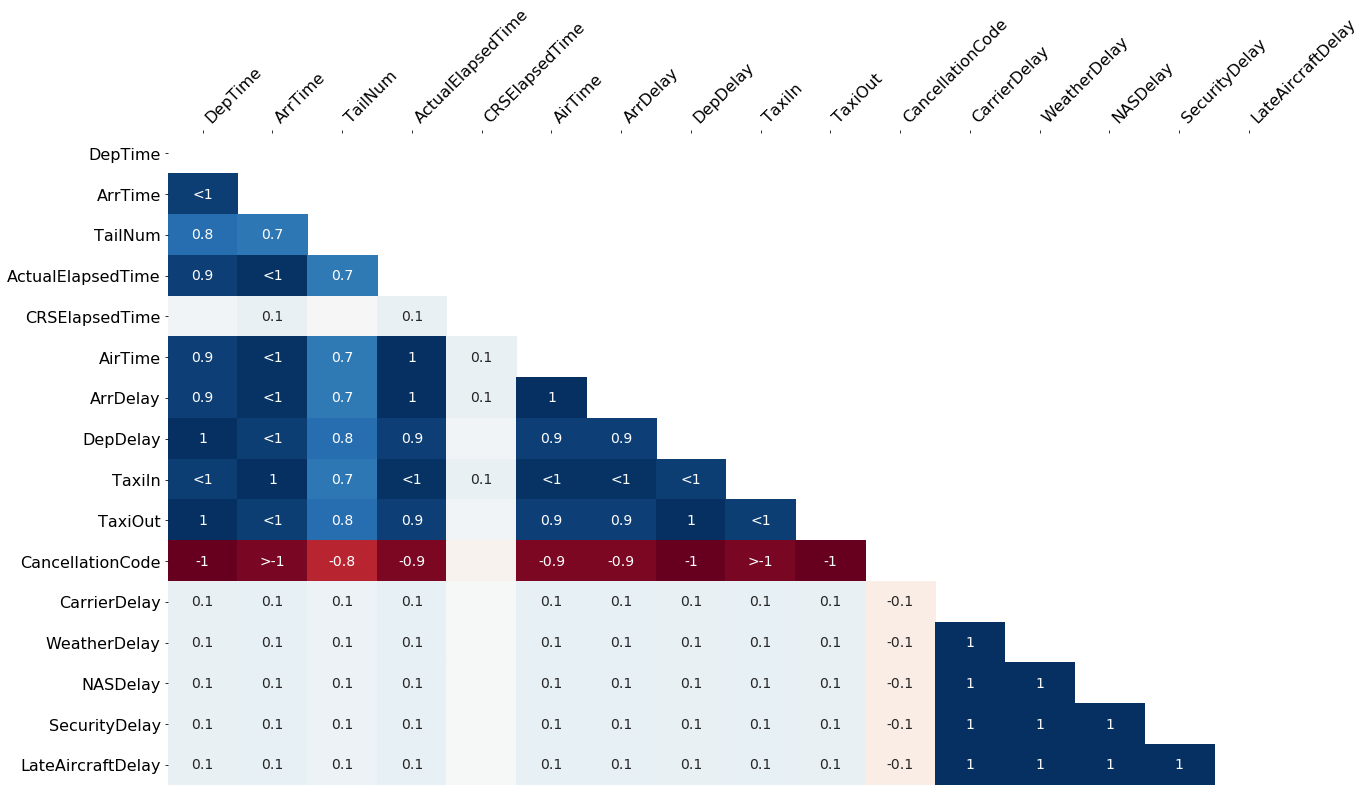

In [16]:
msno.heatmap(df)

In [17]:
df[df['DepDelay'].notnull()]['Cancelled'].value_counts()

0    68589
1       12
Name: Cancelled, dtype: int64

Удалим CancellationCode и Cancelled, так как CancellationCode принимает не nan значение, когда целевая переменная принимает nan/0 значение, по аналагичной причине удалим Cancelled . 

In [18]:
df = df.drop(['CancellationCode','Cancelled'], 1)

In [19]:
dfn = df.dropna(subset=['DepDelay']).reset_index(drop = True)

In [20]:
dfn = dfn[dfn['DepDelay'] != 0].reset_index(drop = True)

In [21]:
X = dfn.drop('DepDelay', 1)
Y = dfn.DepDelay

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [22]:
def totime(df, feat):
    df[feat] = df[df[feat].notnull()][feat].apply(lambda x: str(int(x)).zfill(4)) 
   
    df[feat + '_Hour'] = df[df[feat].notnull()][feat].str[:-2].astype(int) 
    df[feat + '_Minute'] = df[df[feat].notnull()][feat].str[-2:].astype(int)
    df = df.drop(feat, 1)
    return df

In [23]:
for i in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    X = totime(X, i)

### **8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [24]:
X = X.drop(['Year', 'TailNum'], 1)

In [25]:
df.corr()['DepDelay']

Year                      NaN
Month               -0.027598
DayofMonth           0.008002
DayOfWeek            0.008023
DepTime              0.198135
CRSDepTime           0.137659
ArrTime              0.069991
CRSArrTime           0.133053
FlightNum            0.015708
ActualElapsedTime    0.041170
CRSElapsedTime       0.033920
AirTime              0.025105
ArrDelay             0.930046
DepDelay             1.000000
Distance             0.024383
TaxiIn               0.020684
TaxiOut              0.097841
Diverted             0.024980
CarrierDelay         0.535580
WeatherDelay         0.240096
NASDelay             0.162387
SecurityDelay        0.011400
LateAircraftDelay    0.558168
Name: DepDelay, dtype: float64

In [26]:
c = pd.DataFrame({
    'DepDelay':df.DepDelay,
    'SumDelay':(df.SecurityDelay + df.CarrierDelay + df.WeatherDelay + df.NASDelay + df.LateAircraftDelay)
})
c.corr().DepDelay[1]

0.93151943728577991

Следующие переменные также решено удалить: 'ArrDelay' - по причине слишком высокой корреляции с целевой переменной,


-'ArrTime_Hour', 'ArrTime_Minute' - по причине того, что линейная комбинация этих переменных (и 'DepTime_Hour', 'DepTime_Minute')  может дать точное значение целевой переменной (не было бы смысл а в прогнозировании), поэтому среди этих переменных решено было оставить только 'DepTime_Hour' и 'DepTime_Minute'.

-'FlightNum' - по причине того, что является уникальным значением.

-'SecurityDelay', 'CarrierDelay','WeatherDelay', 'NASDelay', 'LateAircraftDelay' - по причине того, что сумма этих переменных практически равняется целевой переменной (имеет высокую корреляцию 0.93). Таким образом, если оставить эти переменные, нет смысла в прогнозировании, фактически, по логике, целевая переменная является суммой этих значений. 

Удалим переменные после построения гистограмм.

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

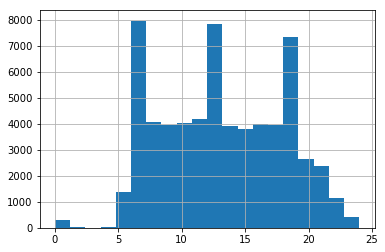

In [27]:
X['DepTime_Hour'].hist(bins=20)

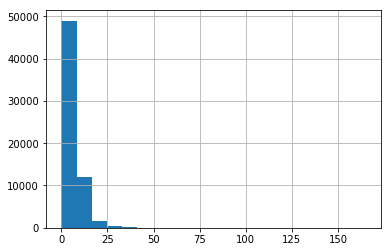

In [28]:
X['TaxiIn'].hist(bins=20)

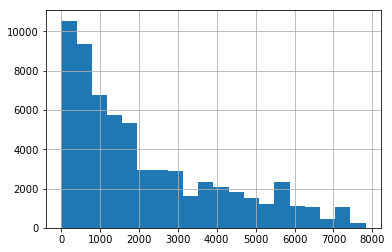

In [29]:
X['FlightNum'].hist(bins=20)

In [30]:
X = X.drop(['ArrDelay', 'ArrTime_Hour', 'ArrTime_Minute',
           'FlightNum', 'SecurityDelay', 'CarrierDelay',
           'WeatherDelay', 'NASDelay', 'LateAircraftDelay'], 1)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

При таких данных возникнет проблема с подбором весов, так как вес будет зависеть не только от значимости переменной, но и от ее абсолютных значений (так как некоторые переменные, такие как FlightNum могут принимать слишком большие значения)

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
def transform_data(data):
    cat_columns = ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 
                   'Dest', 'DepTime_Hour', 'DepTime_Minute', 
                   'CRSDepTime_Hour', 'CRSDepTime_Minute', 'CRSArrTime_Hour', 'CRSArrTime_Minute']
    int_columns = ['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'Diverted', 'ActualElapsedTime','CRSElapsedTime' ]
    
    data[cat_columns] = data[cat_columns].fillna('nan')
    data[int_columns] = data[int_columns].fillna(0)
    scaler = StandardScaler()
    scaler.fit(data[int_columns])
    data[int_columns] = scaler.transform(data[int_columns])
    return pd.get_dummies(data, prefix=cat_columns, columns=cat_columns)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [33]:
X = transform_data(X)

In [34]:
X.shape

(63404, 925)

Мы получили очень большое число признаков, что будет представлять трудность в обучении модели.

Кроме того, есть много бинарных признаков, где количество ненулевых элементов крайне мало, что также будет представлять трудность для подбора весов (из-за недостаточного количества наблюдений, алгоритм не сможет обучиться подобрать оптимальный вес). 

Поэтому, уберем признаки, где количество ненулевых элементов меньше 1000.

In [35]:
X = (X.drop(X.columns[(X != 0).astype(int).sum(axis=0) < 1000], 1))

In [36]:
X.shape

(63404, 228)

**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 11)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train[:1000], y_train[:1000])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train[:1000])
print('Results:',
      '\n test sample R^2 : ' , r2_score(y_pred_test,y_test),
      '\n test sample MSE : ' , mean_squared_error(y_test, y_pred_test),
      '\n train sample R^2 : ' , r2_score(y_pred_train[:1000], y_train[:1000]),
      '\n train sample MSE : ' , mean_squared_error(y_train[:1000], y_pred_train))

Results: 
 test sample R^2 :  -0.000769987659571 
 test sample MSE :  1.64603413118e+17 
 train sample R^2 :  0.16219526265 
 train sample MSE :  660.623112396


In [43]:
lr.coef_

array([  3.27325682e+10,   1.61547241e+01,  -3.14442471e+10,
        -2.54442215e+00,  -2.26553565e+09,  -5.27380760e+09,
         7.25105877e+08,  -2.51305877e+13,  -2.51305877e+13,
        -2.51305877e+13,  -2.51305877e+13,  -2.51305877e+13,
        -2.51305877e+13,  -2.51305877e+13,  -2.51305877e+13,
        -2.51305877e+13,  -2.51305877e+13,  -2.51305877e+13,
        -2.51305877e+13,   2.86087057e+13,   2.86087057e+13,
         2.86087057e+13,   2.86087057e+13,   2.86087057e+13,
         2.86087057e+13,   2.86087057e+13,   2.86087057e+13,
         2.86087057e+13,   2.86087057e+13,   2.86087057e+13,
         2.86087057e+13,   2.86087057e+13,   2.86087057e+13,
         2.86087057e+13,   2.86087057e+13,   2.86087057e+13,
         2.86087057e+13,   2.86087057e+13,   2.86087057e+13,
         2.86087057e+13,   2.86087057e+13,   2.86087057e+13,
         2.86087057e+13,   2.86087057e+13,   2.86087057e+13,
         2.86087057e+13,   2.86087057e+13,   2.86087057e+13,
         2.86087057e+13,

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

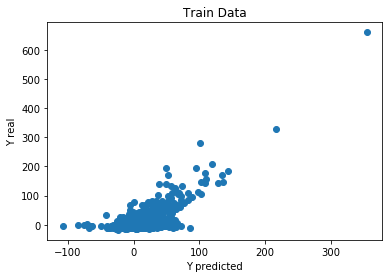

In [45]:
plt.scatter(y_pred_train, y_train[:1000])
plt.title('Train Data')
plt.xlabel('Y predicted')
plt.ylabel('Y real')

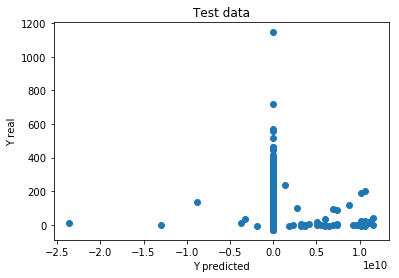

In [46]:
plt.scatter(y_pred_test, y_test)
plt.title('Test data')
plt.xlabel('Y predicted')
plt.ylabel('Y real')

В данном случае мы сталкиваемся с проблемой переобучения. Об этом говорят следующие признаки:

- Некоторым признакам присвоены слишком большие веса

- Алгоритм неплохо научился предсказывать результаты для обучающей выборки, в то время как для тестовой выборки прогнозы совершенно не реалистичны.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [47]:
from sklearn import linear_model

In [48]:
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg.fit(X_train[:1000], y_train[:1000])       
linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
print('alpha: ', reg.alpha_)

alpha:  0.1


In [49]:
y_pred_test = reg.predict(X_test)
y_pred_train = reg.predict(X_train[:1000])
print('Results:',
      '\n test sample R^2 : ' , reg.score(X_test,y_test),
      '\n test sample MSE : ' , mean_squared_error(y_test, y_pred_test),
      '\n train sample R^2 : ' , reg.score(X_train[:1000], y_train[:1000]),
      '\n train sample MSE : ' , mean_squared_error(y_train[:1000], y_pred_train))

Results: 
 test sample R^2 :  -0.0790523665276 
 test sample MSE :  1421.57543907 
 train sample R^2 :  0.534580427438 
 train sample MSE :  674.301051447


In [50]:
reg.coef_

array([ -6.34655754e+00,   1.47771064e+01,  -7.12265642e+00,
        -1.07233110e-02,   1.14490979e+00,   2.66173186e+00,
         5.56959076e-01,   1.97139537e+00,   8.16283866e+00,
        -4.97301822e+00,  -1.06587828e+00,  -2.38171815e+00,
        -9.86023509e-01,  -6.01701144e+00,   5.58174375e-01,
         8.44742247e+00,  -4.68172000e+00,  -3.19372364e+00,
         4.15926239e+00,  -1.63566860e+00,   6.95976858e-01,
        -2.97042292e+00,   1.44245373e+01,  -6.48466696e-01,
        -9.15080220e+00,  -5.98945291e-01,   1.92037233e+01,
        -7.20265090e+00,  -3.71474917e+00,   5.70299161e+00,
        -8.28181773e+00,  -5.17909345e+00,  -4.28682153e+00,
        -3.46329051e+00,  -5.87055519e+00,   1.51742637e+00,
        -2.40033567e+00,  -2.83999438e+00,   1.79694744e+00,
        -9.35466862e-01,  -1.75169758e+00,   2.69241689e+00,
         3.75479682e+00,   6.42324890e+00,   2.04077440e+00,
         4.28907211e+00,  -7.14233209e-01,  -6.73668597e+00,
        -8.47373717e-01,

In [51]:
reg = linear_model.LassoCV(alphas=[0.1, 1.0, 10.0])
reg.fit(X_train[:1000], y_train[:1000])       
linear_model.LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)
print('alpha: ', reg.alpha_)

alpha:  1.0


In [52]:
y_pred_test = reg.predict(X_test)
y_pred_train = reg.predict(X_train[:1000])
print('Results:',
      '\n test sample R^2 : ' , reg.score(X_test,y_test),
      '\n test sample MSE : ' , mean_squared_error(y_test, y_pred_test),
      '\n train sample R^2 : ' , reg.score(X_train[:1000], y_train[:1000]),
      '\n train sample MSE : ' , mean_squared_error(y_train[:1000], y_pred_train))

Results: 
 test sample R^2 :  0.00790550753622 
 test sample MSE :  1307.01456896 
 train sample R^2 :  0.0374457799573 
 train sample MSE :  1394.55098348


In [53]:
reg.coef_

array([ 0.        ,  0.        ,  0.        ,  1.23938911,  1.6811008 ,
        2.15834617,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  4.09793112, -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        3.00603322, -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        2.58915313, -0.        ,  0.        , -0.        , -0.  

В обоих случаях удалось решить проблему переобучения: отсутвуют слишком большие веса, результаты адекватны на тестовой выборке.

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [54]:
X_train.insert(0, 'const', 1)
X_test.insert(0, 'const', 1)

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

Для решения задачи используем известные результаты для обычного MSE, учитывая, что, в формулу для MSE будут подаваться значения, деленые на y_i.  

In [55]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return X@w

In [56]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    X_new = np.asmatrix(X)/np.asmatrix(y.values.reshape(-1, 1))
    y_new = y.values.reshape(-1, 1)/y.values.reshape(-1, 1)
    return float((y_new - X_new@w).T@(y_new - X_new@w))/len(X)

In [57]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    X_new = np.asmatrix(X)/np.asmatrix(y.values.reshape(-1, 1))
    y_new = y.values.reshape(-1, 1)/y.values.reshape(-1, 1)
    return 2/(len(X))*X_new.T@(X_new@w - y_new)

In [58]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    X_new = np.asmatrix(X)/np.asmatrix(y.values.reshape(-1, 1))
    y_new = y.values.reshape(-1, 1)/y.values.reshape(-1, 1)
    return float((y_new - X_new@w).T@(y_new - X_new@w)/len(X) + np.linalg.norm(w)**2)

In [59]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    X_new = np.asmatrix(X)/np.asmatrix(y.values.reshape(-1, 1))
    y_new = y.values.reshape(-1, 1)/y.values.reshape(-1, 1)
    return 2*X_new.T@(X_new@w - y_new)/len(X) + 2*w

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

Чтобы градиентный спуск не "пересакивал" нужные значения, в функции размер шага уменьшается с каждой итерацией (step_size/sqrt(n))

In [60]:
import math

In [61]:
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    weights = [w0]
    if is_reg == True:
        MSPE = [get_reg_func(w0, X, y)]
        
        for i in range(max_iter):
            weights.append(weights[-1] - step_size/math.sqrt(len(weights))*get_reg_grad(weights[-1], X, y))
            MSPE.append( get_func(weights[-1], X, y))
            if np.linalg.norm(weights[-2] - weights[-1]) <= eps:
                break
    else:
        MSPE = [get_func(w0, X, y)]
        for i in range(max_iter):
            weights.append(weights[-1] - step_size/math.sqrt(len(weights))*get_grad(weights[-1], X, y))
            MSPE.append(get_func(weights[-1], X, y))
            if np.linalg.norm(weights[-2] - weights[-1]) <= eps:
                break
    return weights, MSPE

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [62]:
l0001 = grad_descent(X_train, y_train, np.zeros(len(X_train.columns)).reshape(-1,1),0.001, 300, 0.00001, False)

In [63]:
l01 = grad_descent(X_train, y_train, np.zeros(len(X_train.columns)).reshape(-1,1),1, 300, 0.001, False)

In [64]:
l010 = grad_descent(X_train, y_train, np.zeros(len(X_train.columns)).reshape(-1,1),10, 300, 0.001, False)

In [65]:
lr001 = grad_descent(X_train, y_train, np.random.rand(len(X_train.columns),).reshape(-1,1),0.001, 300, 0.00001, False)

In [66]:
lr1 = grad_descent(X_train, y_train, np.random.rand(len(X_train.columns),).reshape(-1,1),1, 300, 0.001, False)

In [67]:
lr10 = grad_descent(X_train, y_train, np.random.rand(len(X_train.columns),).reshape(-1,1),10, 300, 0.001, False)

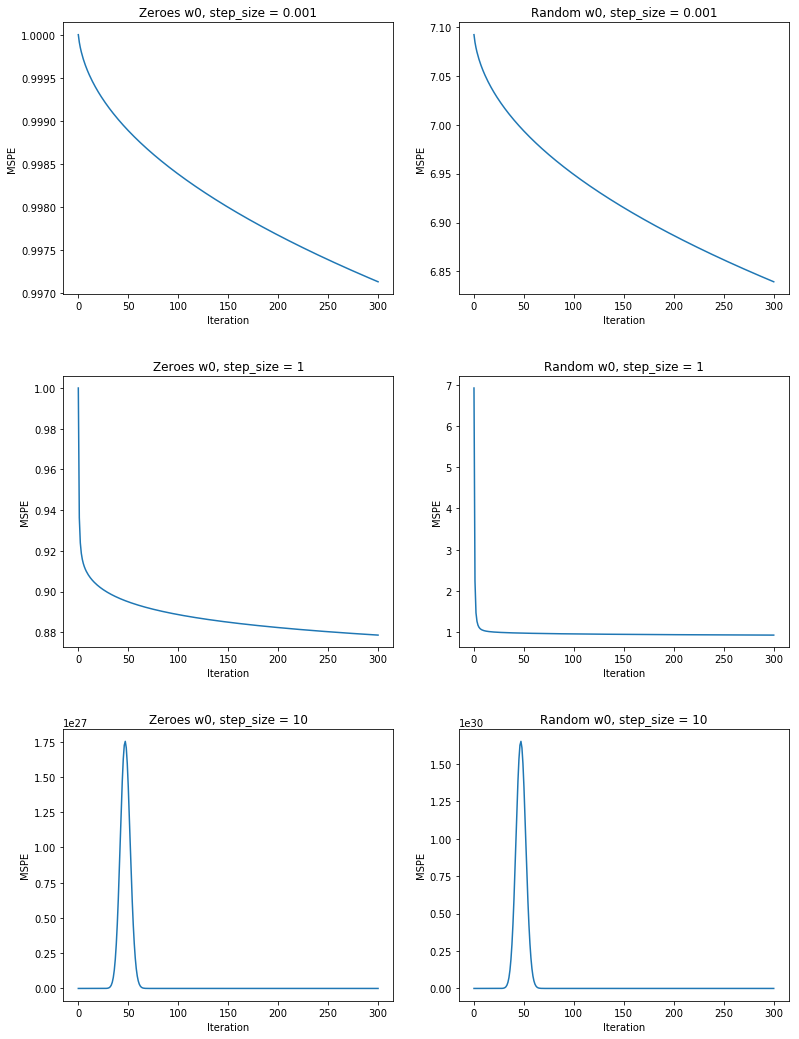

In [68]:
f, axarr = plt.subplots(3, 2, figsize = (13, 18))

axarr[0,0].plot(l0001[1])
axarr[0,0].set_title('Zeroes w0, step_size = 0.001')
axarr[0,0].set_xlabel('Iteration')
axarr[0,0].set_ylabel('MSPE')

axarr[0,1].plot(lr001[1])
axarr[0,1].set_title('Random w0, step_size = 0.001')
axarr[0,1].set_xlabel('Iteration')
axarr[0,1].set_ylabel('MSPE')


axarr[1,0].plot(l01[1])
axarr[1,0].set_title('Zeroes w0, step_size = 1')
axarr[1,0].set_xlabel('Iteration')
axarr[1,0].set_ylabel('MSPE')

axarr[1,1].plot(lr1[1])
axarr[1,1].set_title('Random w0, step_size = 1')
axarr[1,1].set_xlabel('Iteration')
axarr[1,1].set_ylabel('MSPE')


axarr[2,0].plot(l010[1])
axarr[2,0].set_title('Zeroes w0, step_size = 10')
axarr[2,0].set_xlabel('Iteration')
axarr[2,0].set_ylabel('MSPE')

axarr[2,1].plot(lr10[1])
axarr[2,1].set_title('Random w0, step_size = 10')
axarr[2,1].set_xlabel('Iteration')
axarr[2,1].set_ylabel('MSPE')

f.subplots_adjust(hspace=0.3)

Параметры влияют и на скорость сходимости и на итоговое качество:

- При маленьком размере шага сходимость ищется дольше, есть вероятность так и не добраться до минимума, особенно, если изначальные веса далеки от наилучших.

- При большом размере шага есть вероятность "проскочить" оптимальную точку и получить большее значение.

- При случайном выборе начальных весов они могут оказаться очень далеки оптимальных, соответсвенно, в таком случее алгоритму понадобится больше времени, чтобы найти оптимум (он может и не дойти до него)

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [69]:
l0001r = grad_descent(X_train, y_train, np.zeros(len(X_train.columns)).reshape(-1,1),0.001, 300, 0.00001, True)

In [70]:
l01r = grad_descent(X_train, y_train, np.zeros(len(X_train.columns)).reshape(-1,1),1, 300, 0.001, True)

In [71]:
l010r = grad_descent(X_train, y_train, np.zeros(len(X_train.columns)).reshape(-1,1),10, 300, 0.001, True)

In [72]:
lr001r = grad_descent(X_train, y_train, np.random.rand(len(X_train.columns),).reshape(-1,1),0.001, 300, 0.00001, True)

In [73]:
lr1r = grad_descent(X_train, y_train, np.random.rand(len(X_train.columns),).reshape(-1,1),1, 300, 0.001, True)

In [74]:
lr10r = grad_descent(X_train, y_train, np.random.rand(len(X_train.columns),).reshape(-1,1),10, 300, 0.001, True)

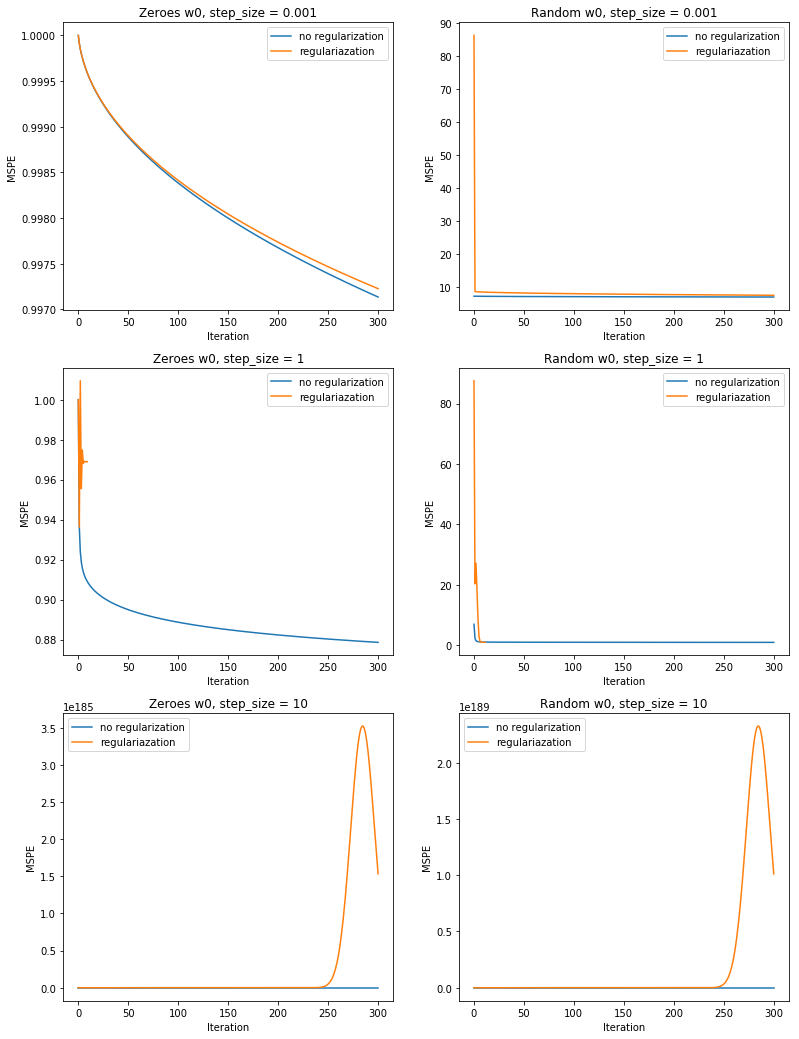

In [75]:
f, axarr = plt.subplots(3, 2, figsize = (13, 18))

axarr[0,0].plot(l0001[1], label = 'no regularization')
axarr[0,0].plot(l0001r[1], label = 'regulariazation' )
axarr[0,0].set_title('Zeroes w0, step_size = 0.001')
axarr[0,0].set_xlabel('Iteration')
axarr[0,0].set_ylabel('MSPE')
axarr[0,0].legend()

axarr[0,1].plot(lr001[1], label = 'no regularization')
axarr[0,1].plot(lr001r[1], label = 'regulariazation')
axarr[0,1].set_title('Random w0, step_size = 0.001')
axarr[0,1].set_xlabel('Iteration')
axarr[0,1].set_ylabel('MSPE')
axarr[0,1].legend()



axarr[1,0].plot(l01[1], label = 'no regularization')
axarr[1,0].plot(l01r[1], label = 'regulariazation')
axarr[1,0].set_title('Zeroes w0, step_size = 1')
axarr[1,0].set_xlabel('Iteration')
axarr[1,0].set_ylabel('MSPE')
axarr[1,0].legend()


axarr[1,1].plot(lr1[1], label = 'no regularization')
axarr[1,1].plot(lr1r[1], label = 'regulariazation')
axarr[1,1].set_title('Random w0, step_size = 1')
axarr[1,1].set_xlabel('Iteration')
axarr[1,1].set_ylabel('MSPE')
axarr[1,1].legend()



axarr[2,0].plot(l010[1], label = 'no regularization')
axarr[2,0].plot(l010r[1], label = 'regulariazation')
axarr[2,0].set_title('Zeroes w0, step_size = 10')
axarr[2,0].set_xlabel('Iteration')
axarr[2,0].set_ylabel('MSPE')
axarr[2,0].legend()


axarr[2,1].plot(lr10[1], label = 'no regularization')
axarr[2,1].plot(lr10r[1], label = 'regulariazation')
axarr[2,1].set_title('Random w0, step_size = 10')
axarr[2,1].set_xlabel('Iteration')
axarr[2,1].set_ylabel('MSPE')
axarr[2,1].legend()

Вариант с регуляризацией сходится быстрее

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [76]:
def random_grad_reg(w, X, y):
    r = np.random.randint(len(X))
    X = np.asmatrix(X)
    return -2*float(1 - X[0]@w/y_train.iloc[r])*X[0].T/y_train.iloc[r] + 2*w

In [77]:
def random_grad(w, X, y):
    r = np.random.randint(len(X))
    X = np.asmatrix(X)
    return -2*float(1 - X[0]@w/y_train.iloc[r])*X[0].T/y_train.iloc[r]

In [78]:
def sgd(X, y, w0, step_size, max_iter, eps, is_reg):
    weights = [w0]
    if is_reg == True:
        MSPE = [get_reg_func(w0, X, y)]
        for i in range(max_iter):
            weights.append(weights[-1] - step_size/math.sqrt(len(weights))*random_grad_reg(weights[-1], X, y))
            MSPE.append(get_func(weights[-1], X, y))
            if np.linalg.norm(weights[-2] - weights[-1]) <= eps:
                break
    else:
        MSPE = [get_func(w0, X, y)]
        for i in range(max_iter):
            weights.append(weights[-1] - step_size*random_grad_reg(weights[-1], X, y))
            MSPE.append(get_func(weights[-1], X, y))
            if np.linalg.norm(weights[-2] - weights[-1]) <= eps:
                break
    return weights, MSPE

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [79]:
l = sgd(X_train, y_train, np.zeros(len(X_train.columns)).reshape(-1,1), 0.001, 500, 0.00001, True)

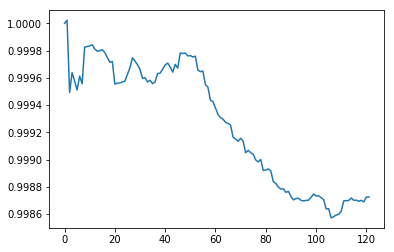

In [80]:
plt.plot(l[1])

In [81]:
lr = sgd(X_train, y_train, np.zeros(len(X_train.columns)).reshape(-1,1), 0.001, 500, 0.00001, False)

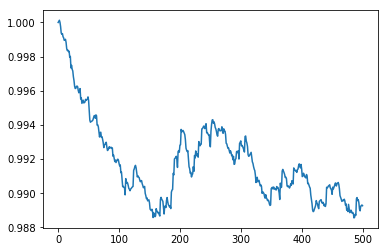

In [82]:
plt.plot(lr[1])

In [113]:
y_pred_test = np.array(make_pred(X_test, l[0][-1]))
y_pred_train = np.array(make_pred(X_train, l[0][-1]))
print('Results for sgd regression without regularization:',
      '\n test sample R^2 : ' , r2_score(y_test,y_pred_test),
      '\n test sample MSE : ' , mean_squared_error(y_test, y_pred_test))

Results: 
 test sample R^2 :  -0.0904148710444 
 test sample MSE :  1436.54473791 
 train sample R^2 :  -108048019.839 
 train sample MSE :  1406.62613275


In [ ]:
y_pred_test = np.array(make_pred(X_test, lr[0][-1]))
y_pred_train = np.array(make_pred(X_train, lr[0][-1]))
print('Results for sgd regression with regularization:',
      '\n test sample R^2 : ' , r2_score(y_test,y_pred_test),
      '\n test sample MSE : ' , mean_squared_error(y_test, y_pred_test))

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

В данном случае SGD с регуляризацией может сходиться как медленнее, так и быстрее

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [ ]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
#get_func(lreg.coef_, X_train, y_train ) здесь аккуратно, я по-моему примерно так сделал и комп сломался()